In [7]:
from math import sin, cos, tan, pi, atan2, gcd
import drawSvg as draw

In [8]:
# TODO: make the attachment radii parametric as well
# More interesting model: child updates parents (allows for diamond dependencies if
# keep track of which parents have been updated)

class Plate:
    def __init__(self, radius, phase=0):
        self.radius = radius
        self.phase = phase % (2*pi)
        self.children = []
        self.x = 0
        self.y = 0
        
    def get_radius(self):
        if hasattr(self.radius, '__call__'):
            return self.radius(self)
        return self.radius
        
    def add_child(self, child, theta, radius=None):
        if radius is None:
            radius = self.radius
        rr = radius + child.get_radius()
        child.x = self.x + rr*cos(theta + self.phase)
        child.y = self.y + rr*sin(theta + self.phase)
        self.children.append((child, theta, radius))
        
    def update(self, dtheta):
        self.phase = (self.phase + dtheta) % (2*pi)
        for child, theta, radius in self.children:
            rr = child.get_radius() + radius
            child.x = self.x + rr*cos(theta + self.phase)
            child.y = self.y + rr*sin(theta + self.phase)
            if child.get_radius() != 0:
                ctheta = -dtheta * radius / child.get_radius()
                child.update(ctheta)
            else:
                child.update(0)
    
    def __repr__(self):
        return "r={}, phase={}, coords=({},{})".format(
            self.get_radius(), 
            self.phase, 
            self.x, 
            self.y
        )

In [9]:
def get_draw_position(x1, y1, x2, y2, l1, l2):
#     angle = tan((x2 - x1)/(y2 - y1)) # lol woops
    angle = atan2(x2-x1, (y2-y1) or 0.0001)
    offshoot = angle + pi/2
    ox = x1 + l1 * cos(angle)
    oy = y1 + l1 * sin(angle)
    drawx = ox + l2 * cos(offshoot)
    drawy = oy + l2 * sin(offshoot)
    return drawx, drawy

In [10]:
def lcm(a, b):
    return abs(a*b) // gcd(a, b)

def lcml(l):
    curr = l[0]
    for i in l[1:]:
        curr = abs(curr*i) // gcd(curr, i)
    return curr

def basic(base_r, r1, r2, l1, l2, p1=0, p2=0,res=50):
    base_plate = Plate(base_r)
    child1 = Plate(r1, phase=p1)
    child2 = Plate(r2, phase=p2)
    base_plate.add_child(child1, 0)
    base_plate.add_child(child2, pi)
    while True:
        x1 = child1.x + child1.get_radius() * cos(child1.phase)
        y1 = child1.y + child1.get_radius() * sin(child1.phase)
        x2 = child1.x + child2.get_radius() * cos(child2.phase)
        y2 = child1.y + child2.get_radius() * sin(child2.phase)
        yield get_draw_position(x1, y1, x2, y2, l1, l2)
        base_plate.update((2*pi)/res)
        
def okay(base_r, r1, r2, l1, l2, p1=0,p2=0,res=50, grr=1):
    g1 = gcd(base_r, r1)
    g2 = gcd(base_r, r2)
    print(g1, g2)
    yay = lcml([r1//g1, r2//g2])
    yay = int(yay / grr)
    return basic(base_r, r1, r2, l1, l2, p1,p2,res), res*yay

In [11]:
def make(coords, iterations, canvas_dim=(400,400)):
    line = []
    canvas = draw.Drawing(*canvas_dim, center=(0,0), displayInline=False)
    for _ in range(iterations):
        x, y= next(coords)
        line.append(canvas_dim[0]/2 + x)
        line.append(canvas_dim[1]/2 + y)
    canvas.append(draw.Lines(*line, close=True, fill='none', stroke='black'))
    canvas.setPixelScale(.5)
    display(canvas.rasterize())

20 20


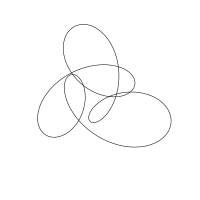

In [12]:
make(*okay(20, 40, 80, 40, 40,50))

10 10


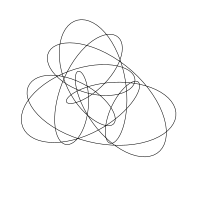

In [13]:
make(*okay(30, 40, 80, 40, 40))

1 10


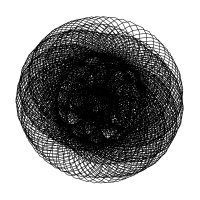

In [14]:
make(*okay(30, 41, 80, 40, 40, res=20))

1 17


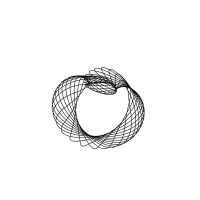

In [15]:
make(*okay(17, 13, 34, 40, 40))

12 1


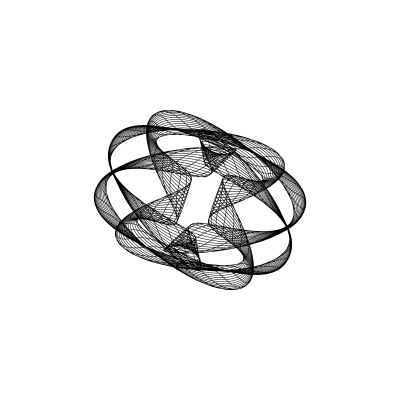

In [16]:
make(*okay(84, 36, 19, 40, 40, res=300), canvas_dim=(800, 800))

12 1


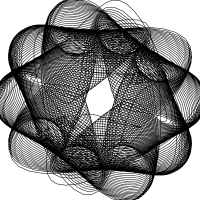

In [17]:
make(*okay(84, 36, 37, 40, 40, grr=1))

12 1


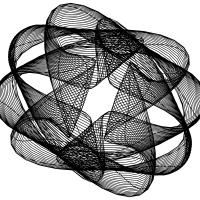

In [18]:
make(*okay(84, 36, 31, 40, 40, grr=1))

1 1


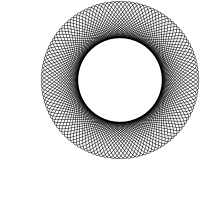

In [19]:
make(*okay(84, 37, 37, 40, 40, grr=1))

50 1


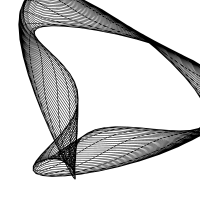

In [20]:
make(*okay(100, 50, 37, 40, 40, grr=1))

20 1


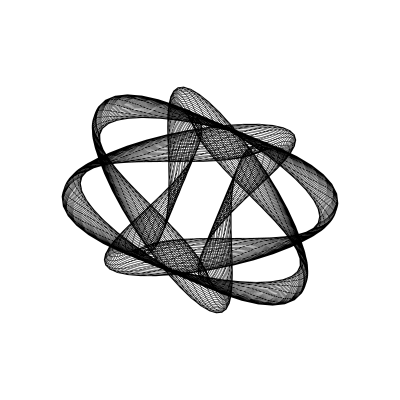

In [21]:
make(*okay(100, 60, 37, 40, 40, grr=1), canvas_dim=(800,800))

50 1


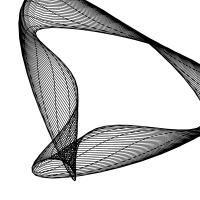

In [22]:
make(*okay(100, 50, 39, 40, 40, grr=1))

50 1


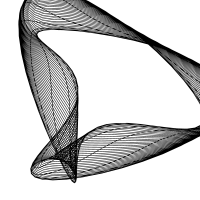

In [23]:
make(*okay(100, 50, 41, 40, 40, grr=1))

50 1


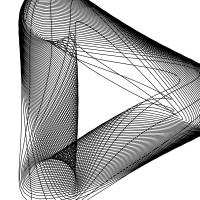

In [24]:
make(*okay(100, 50, 57, 40, 40, grr=1))

50 1


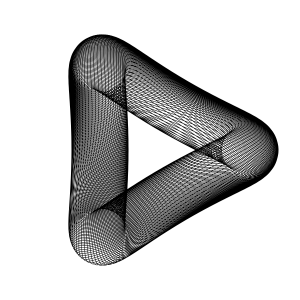

In [25]:
make(*okay(100, 50, 99, 40, 40, grr=1, res=80), canvas_dim=(600, 600))

20 1


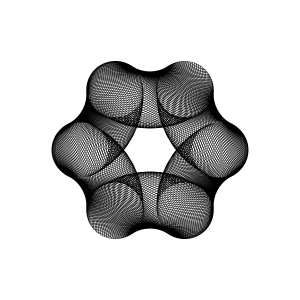

In [26]:
make(*okay(100, 20, 99, 40, 40, grr=1, res=80), canvas_dim=(600, 600))

100 1


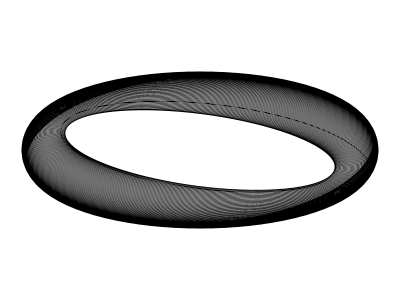

In [27]:
make(*okay(100, 100, 99, 40, 40, grr=1, res=80), canvas_dim=(800, 600))

100 1


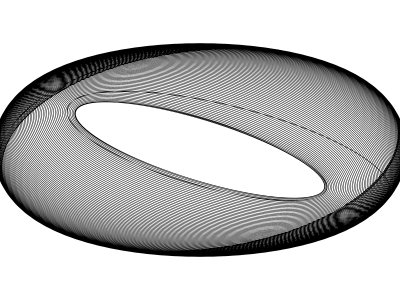

In [28]:
make(*okay(100, 100, 99, 80, 80, grr=1, res=80), canvas_dim=(800, 600))

33 3


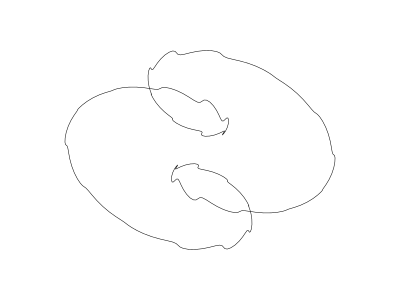

In [29]:
make(*okay(99, 33, 3, 80, 80, res=300), canvas_dim=(800, 600))

30 10


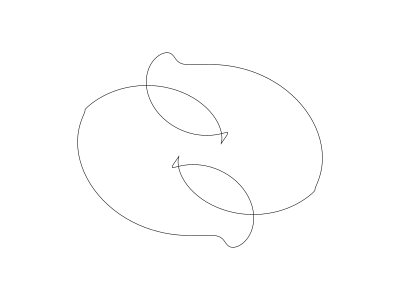

In [30]:
make(*okay(90, 30, 10, 80, 80, res=300), canvas_dim=(800, 600))

1 10


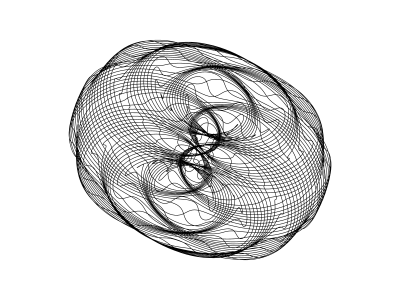

In [31]:
make(*okay(90, 31, 10, 80, 80, res=300), canvas_dim=(800, 600))

30 1


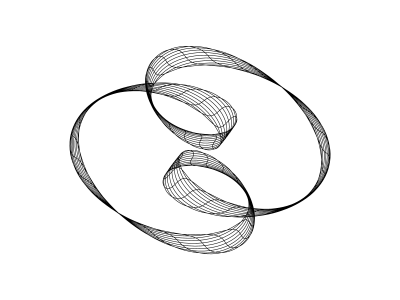

In [32]:
make(*okay(90, 30, 11, 80, 80, res=300), canvas_dim=(800, 600))

30 1


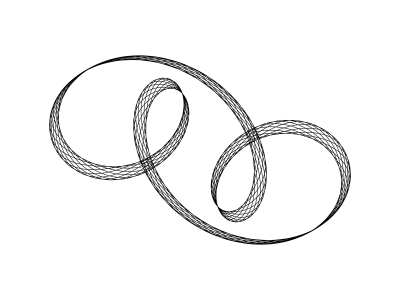

In [33]:
make(*okay(30, 90, 11, 80, 80, res=300), canvas_dim=(800, 600))

30 1


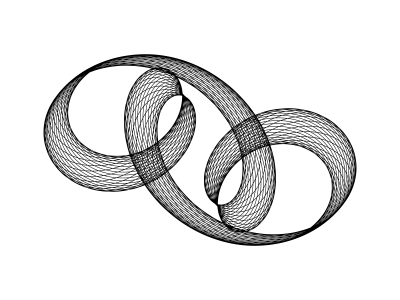

In [34]:
make(*okay(30, 90, 29, 80, 80, res=300), canvas_dim=(800, 600))

30 1


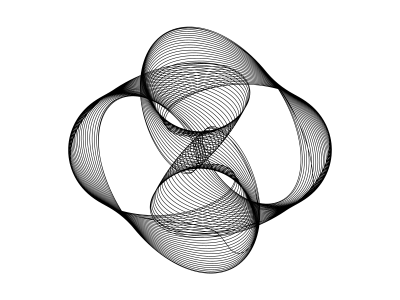

In [35]:
make(*okay(90, 30, 29, 80, 80, res=300), canvas_dim=(800, 600))

30 1


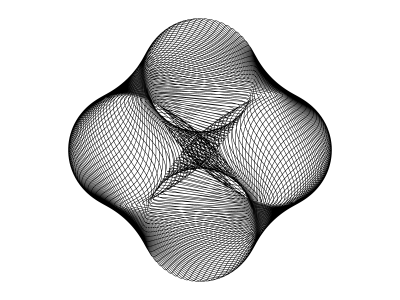

In [36]:
make(*okay(90, 30, 89, 80, 80, res=300), canvas_dim=(800, 600))

1 4


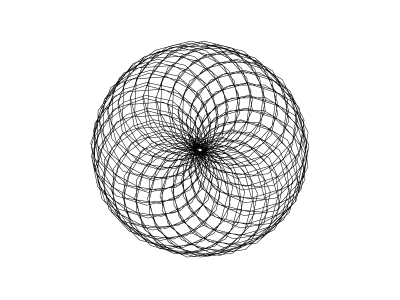

In [37]:
make(*okay(100, 3, 4, 80, 80, res=300), canvas_dim=(800, 600))

2 16


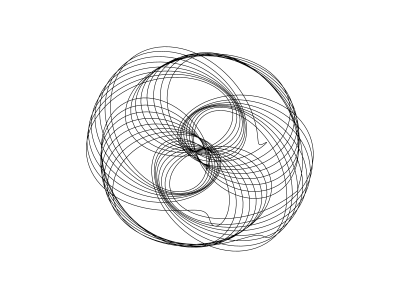

In [38]:
make(*okay(80, 18, 16, 80, 80, res=300), canvas_dim=(800, 600))

2 8


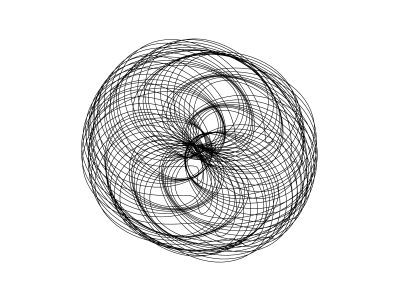

In [39]:
make(*okay(88, 18, 16, 80, 80, res=300), canvas_dim=(800, 600))

2 8


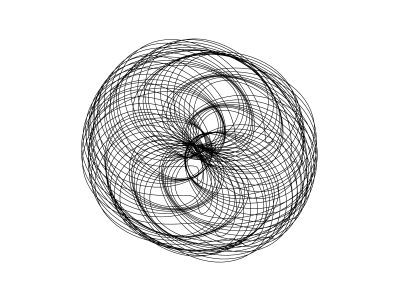

In [40]:
make(*okay(88, 18, 16, 80, 80, res=300), canvas_dim=(800, 600))

2 2


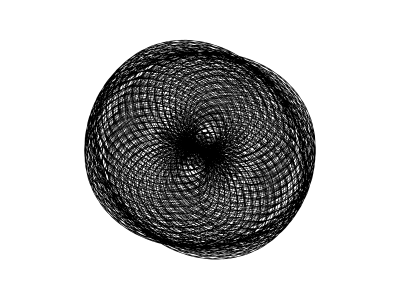

In [41]:
make(*okay(82, 18, 16, 80, 80, res=300), canvas_dim=(800, 600))

5 5


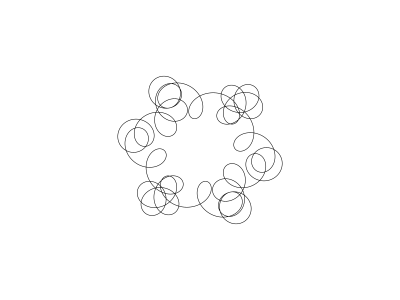

In [42]:
make(*okay(5, 25, 125, 80, 80, res=300), canvas_dim=(800, 600))

25 5


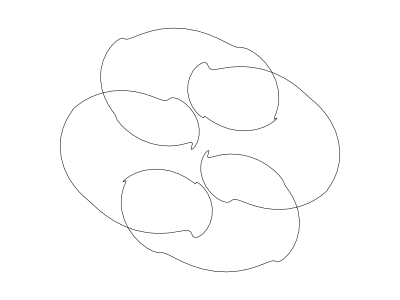

In [43]:
make(*okay(125, 25, 5, 80, 80, res=300), canvas_dim=(800, 600))

5 25


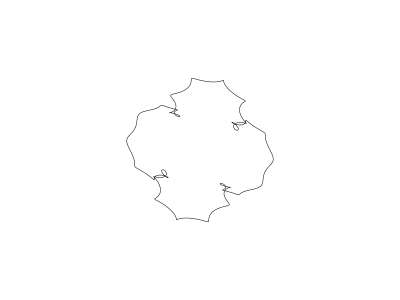

In [44]:
make(*okay(25, 5, 125, 80, 80, res=300), canvas_dim=(800, 600))

1 1


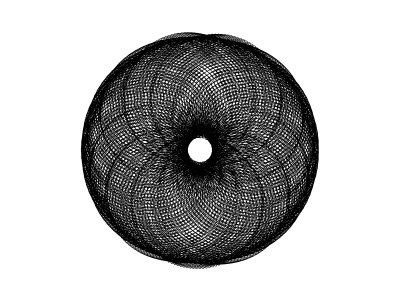

In [45]:
make(*okay(125, 6, 28, 19, 99, res=300), canvas_dim=(800, 600))

2 10


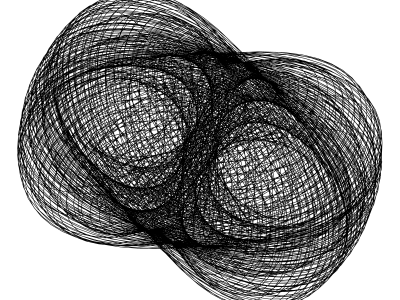

In [46]:
make(*okay(80, 86, 70, 80, 80), canvas_dim=(800, 600))

25 1


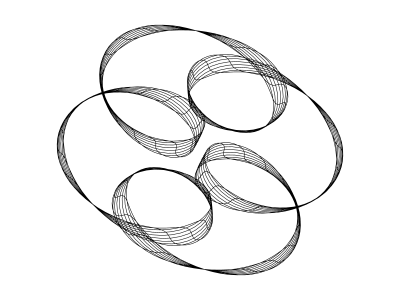

In [47]:
make(*okay(125, 25, 9, 80, 80, res=300), canvas_dim=(800, 600))

25 1


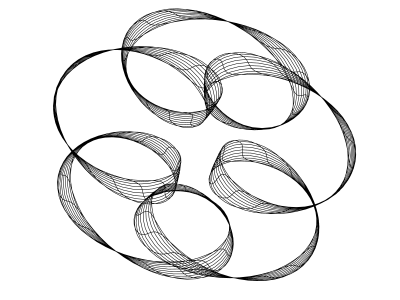

In [48]:
make(*okay(150, 25, 11, 80, 80, res=300), canvas_dim=(800, 600))

20 1


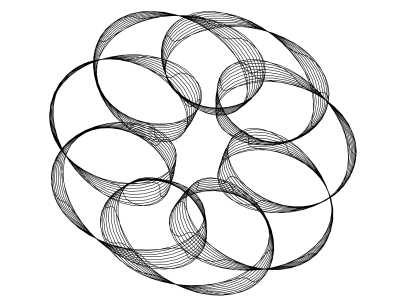

In [49]:
make(*okay(160, 20, 11, 80, 80, res=300), canvas_dim=(800, 600))

50 1


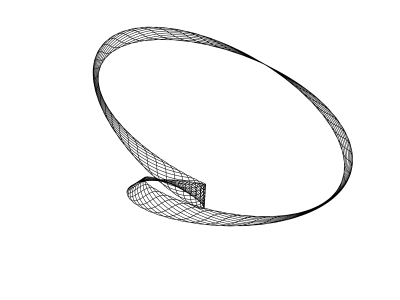

In [50]:
make(*okay(100, 50, 11, 80, 80, res=300), canvas_dim=(800, 600))

50 50


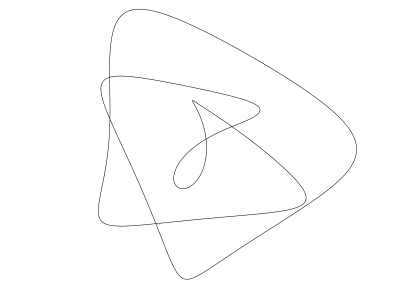

In [51]:
make(*okay(100, 50, 150, 80, 80, res=300), canvas_dim=(800, 600))

1 3


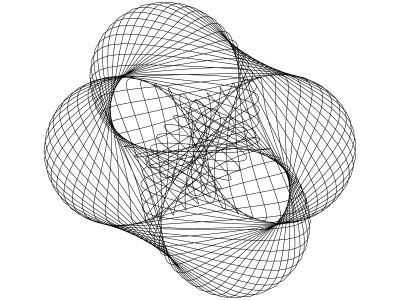

In [52]:
make(*okay(99, 50, 150, 80, 80), canvas_dim=(800, 600))

1 1


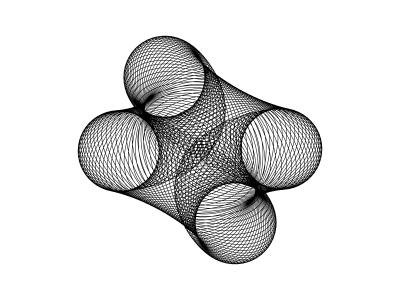

In [53]:
make(*okay(31, 50, 150, 80, 80), canvas_dim=(800, 600))

2 2


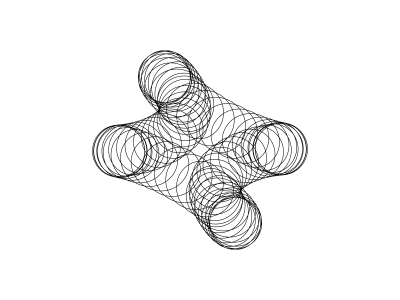

In [54]:
make(*okay(2, 50, 150, 80, 80), canvas_dim=(800, 600))

1 50


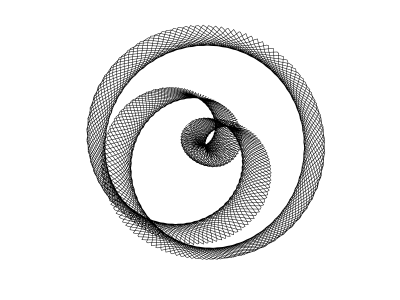

In [55]:
make(*okay(100, 19, 150, 80, 80), canvas_dim=(800, 600))

1 50


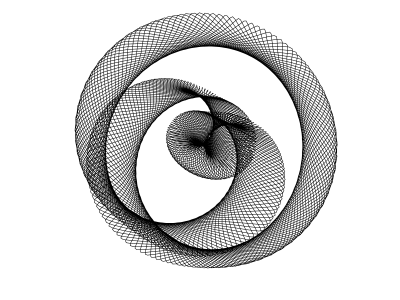

In [56]:
make(*okay(100, 31, 150, 80, 80), canvas_dim=(800, 600))

50 50


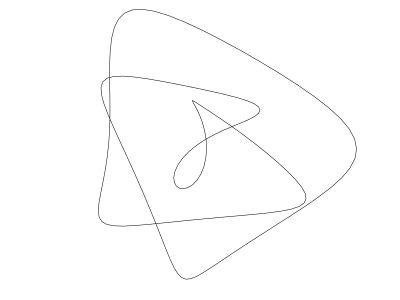

In [57]:
make(*okay(100, 50, 150, 80, 80), canvas_dim=(800, 600))

20 1


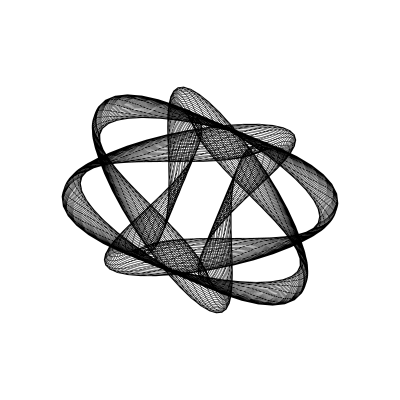

In [58]:
make(*okay(100, 60, 37, 40, 40), canvas_dim=(800,800))

20 1


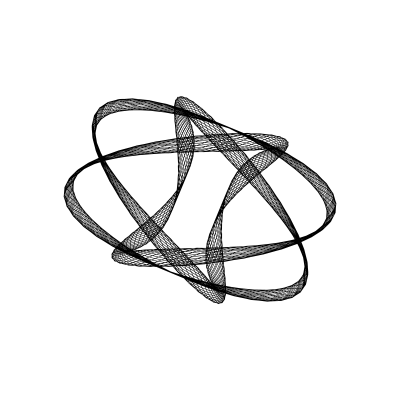

In [59]:
make(*okay(100, 60, 19, 40, 40), canvas_dim=(800,800))

20 1


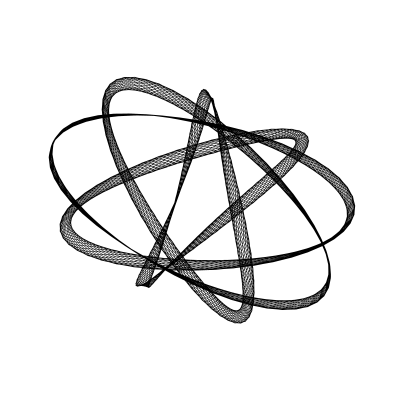

In [60]:
make(*okay(100, 80, 19, 40, 40), canvas_dim=(800,800))

10 1


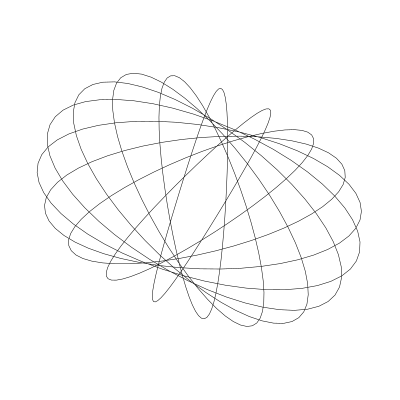

In [61]:
make(*okay(100, 90, 1, 40, 40), canvas_dim=(800,800))

5 1


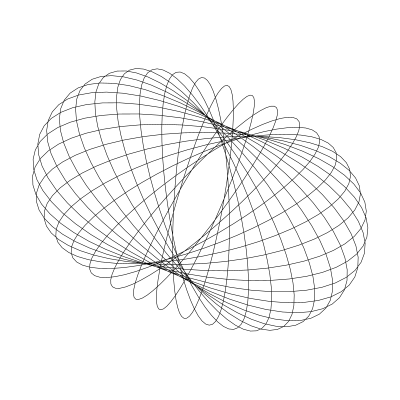

In [62]:
make(*okay(100, 95, 1, 40, 40), canvas_dim=(800,800))

2 1


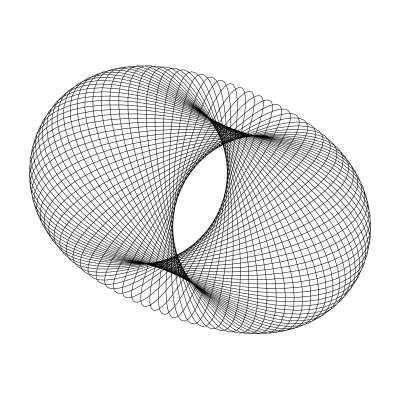

In [63]:
make(*okay(100, 98, 1, 40, 40), canvas_dim=(800,800))

50 1


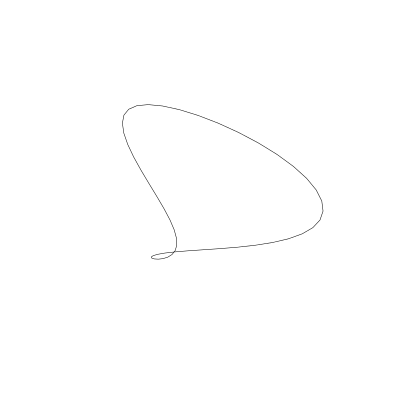

In [64]:
make(*okay(100, 50, 1, 40, 40), canvas_dim=(800,800))

20 1


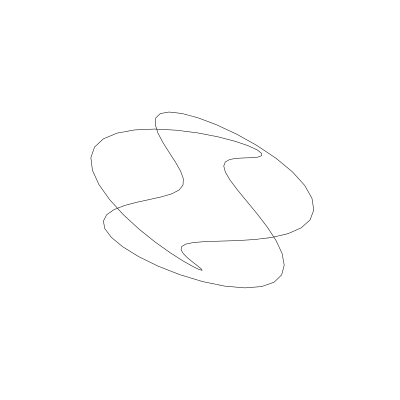

In [65]:
make(*okay(100, 40, 1, 40, 40), canvas_dim=(800,800))

10 1


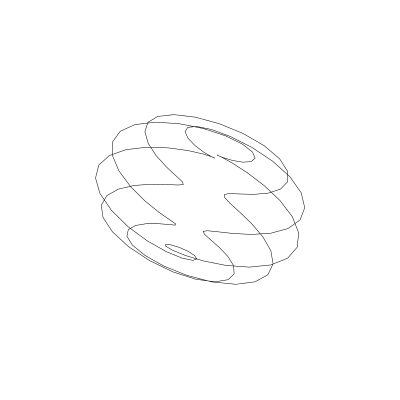

In [66]:
make(*okay(100, 30, 1, 40, 40), canvas_dim=(800,800))

20 1


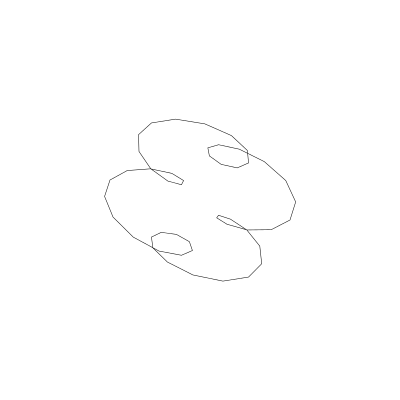

In [67]:
make(*okay(100, 20, 1, 40, 40), canvas_dim=(800,800))

10 1


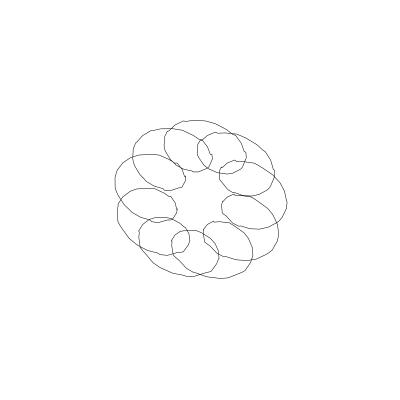

In [68]:
make(*okay(100, 10, 1, 40, 40, res=300), canvas_dim=(800,800))

50 1


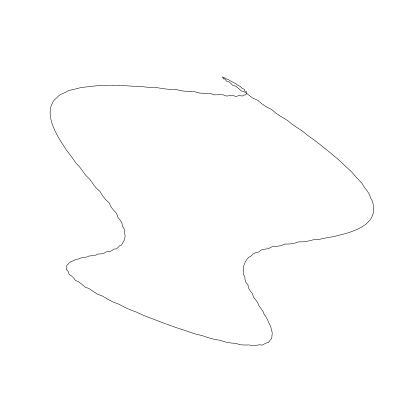

In [69]:
make(*okay(200, 50, 1, 40, 40, res=300), canvas_dim=(800,800))

50 4


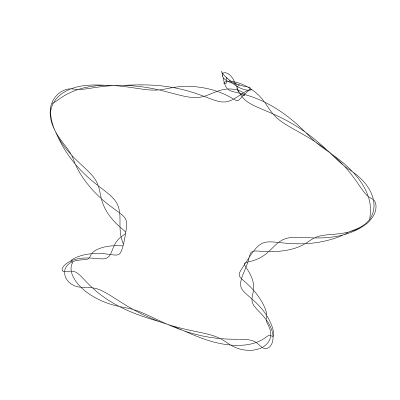

In [70]:
make(*okay(200, 50, 12, 40, 40, res=300), canvas_dim=(800,800))

50 1


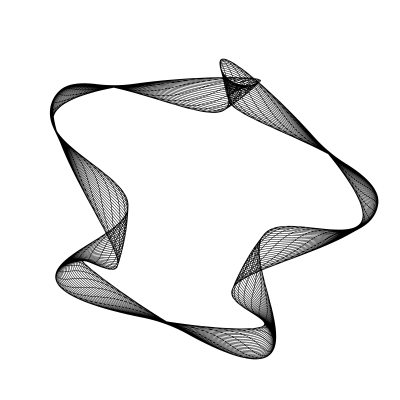

In [71]:
make(*okay(200, 50, 31, 40, 40, res=300), canvas_dim=(800,800))

40 1


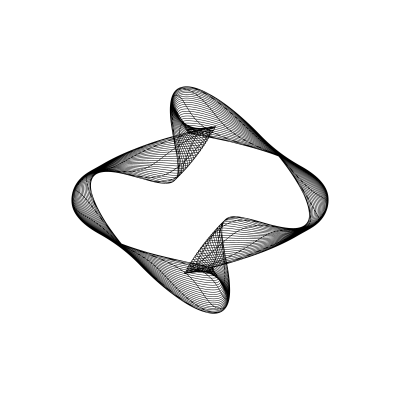

In [72]:
make(*okay(120, 40, 31, 40, 40, res=300), canvas_dim=(800,800))

10 1


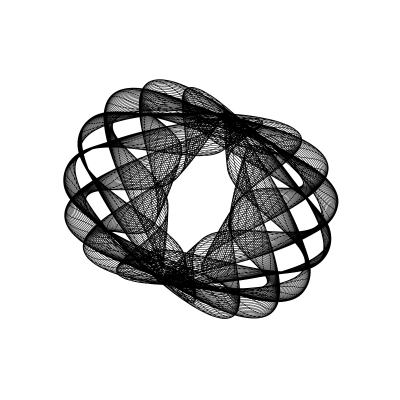

In [73]:
make(*okay(120, 50, 31, 40, 40, res=300), canvas_dim=(800,800))

30 1


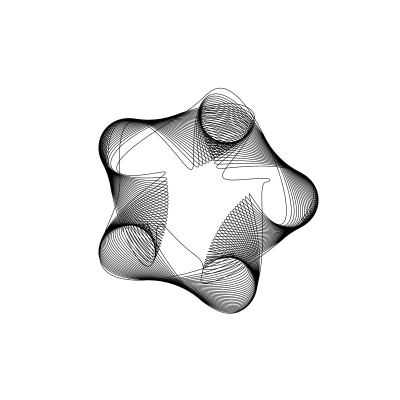

In [74]:
make(*okay(120, 30, 31, 40, 40, res=300), canvas_dim=(800,800))

20 1


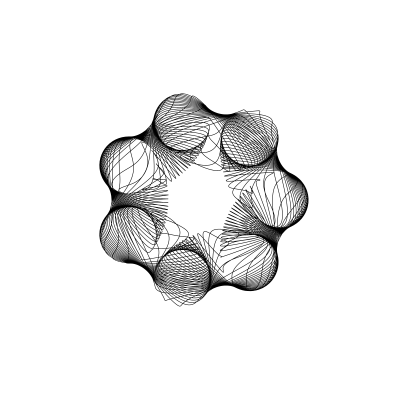

In [75]:
make(*okay(120, 20, 31, 40, 40, res=300), canvas_dim=(800,800))

60 1


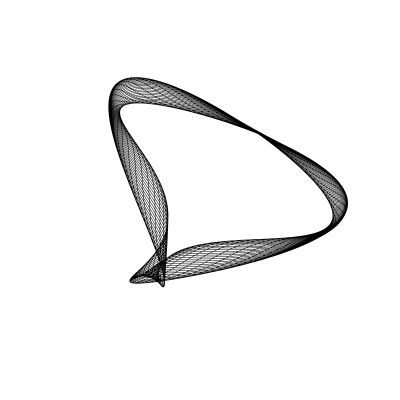

In [76]:
make(*okay(120, 60, 31, 40, 40, res=300), canvas_dim=(800,800)) #1/2

20 1


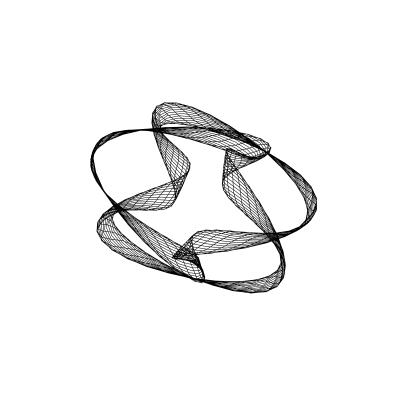

In [77]:
make(*okay(100, 40, 17, 40, 40), canvas_dim=(800,800))

24 1


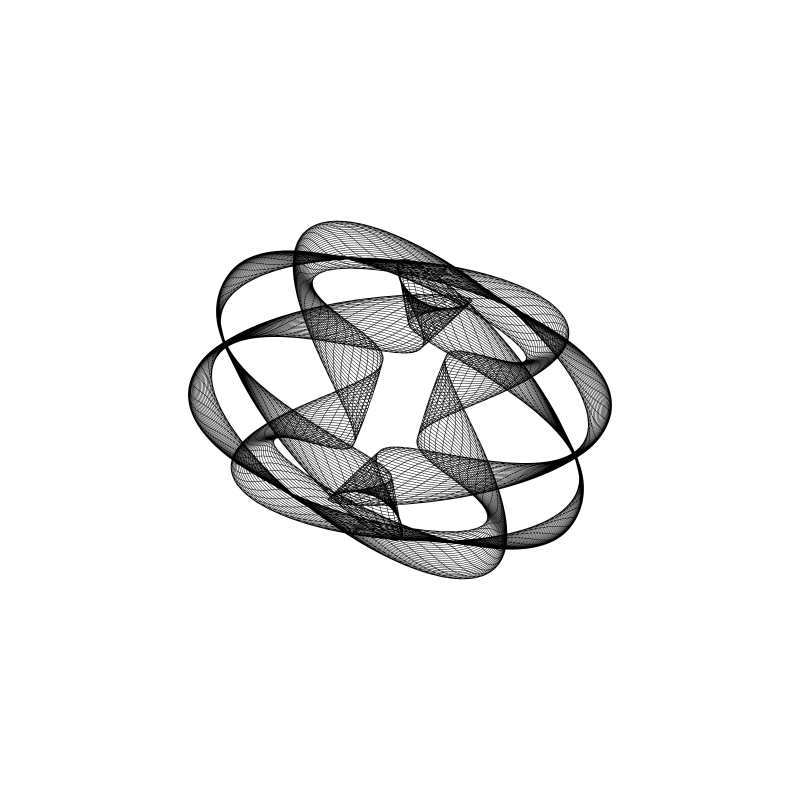

In [78]:
make(*okay(168, 72, 37, 80, 80, res=300), canvas_dim=(1600, 1600)) # 3/7ths

48 1


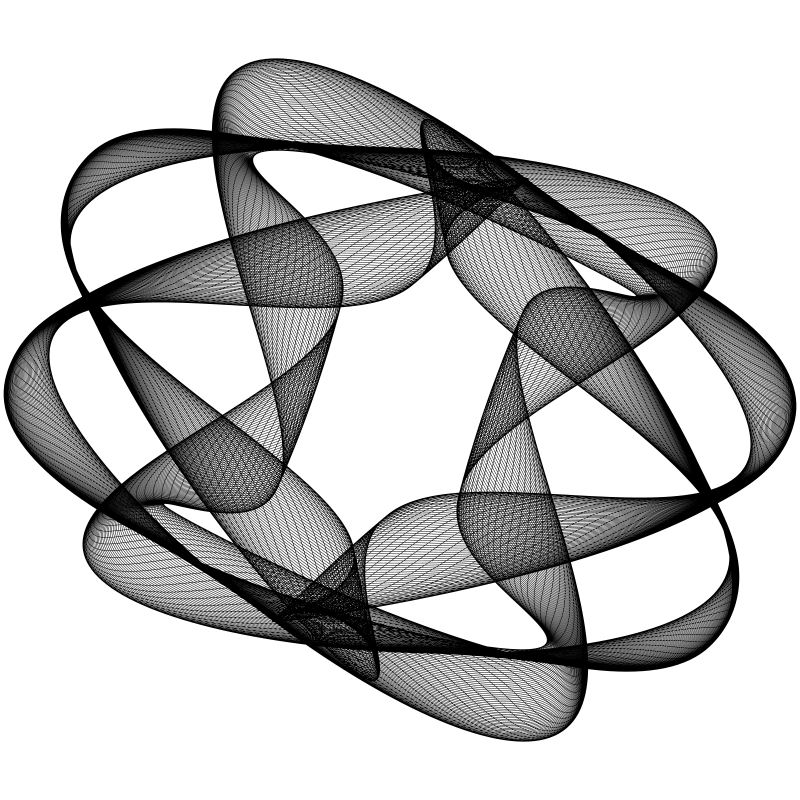

In [79]:
make(*okay(336, 144, 83, 120, 120, res=300), canvas_dim=(1600, 1600))

48 1


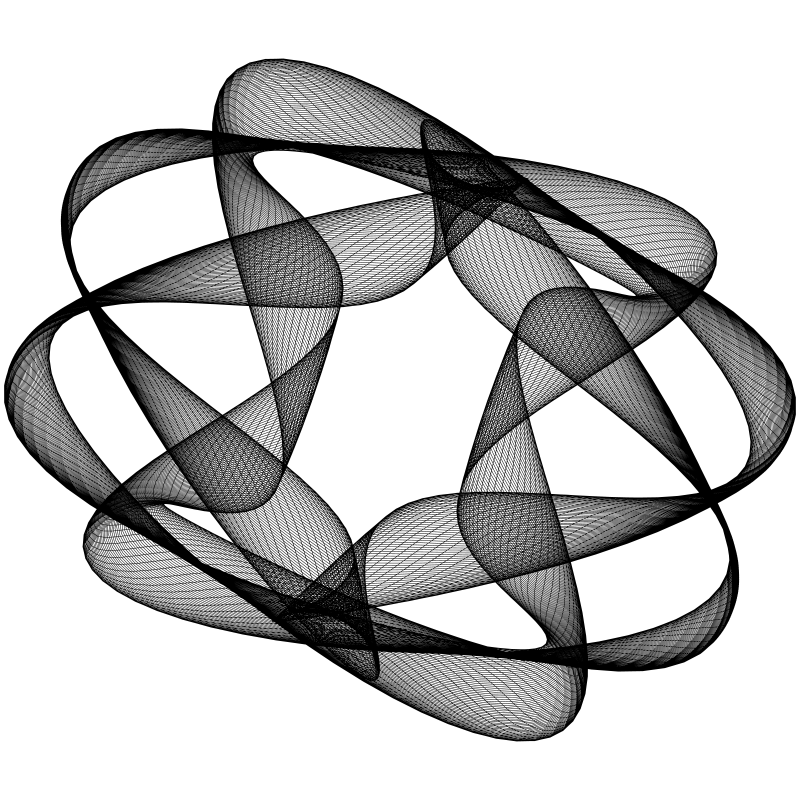

In [80]:
make(*okay(336, 144, 83, 120, 120, res=100), canvas_dim=(1600, 1600))

40 1


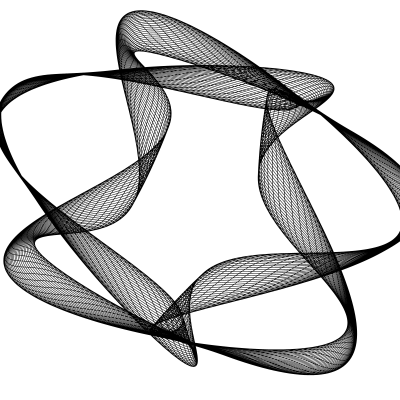

In [81]:
make(*okay(200, 80, 39, 60, 60, res=300), canvas_dim=(800,800))

20 1


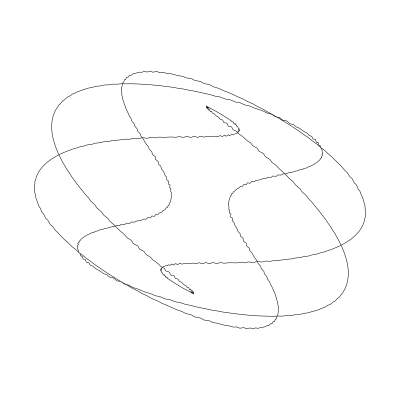

In [82]:
make(*okay(140, 60, 1, 60, 60, res=300), canvas_dim=(800,800)) #3/7ths

20 1


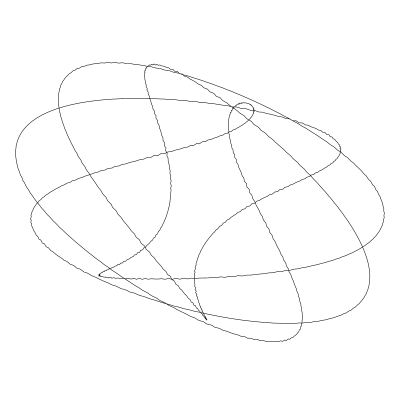

In [83]:
make(*okay(140, 80, 1, 60, 60, res=300), canvas_dim=(800,800)) #3/7ths

10 1


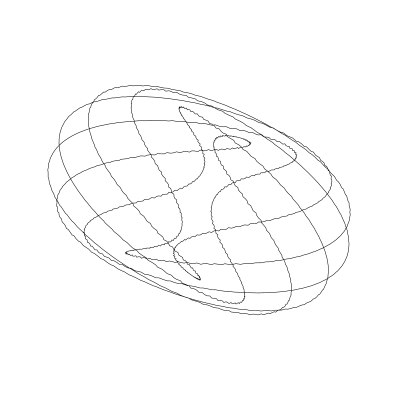

In [84]:
make(*okay(110, 60, 1, 60, 60, res=300), canvas_dim=(800,800)) #3/7ths

40 60


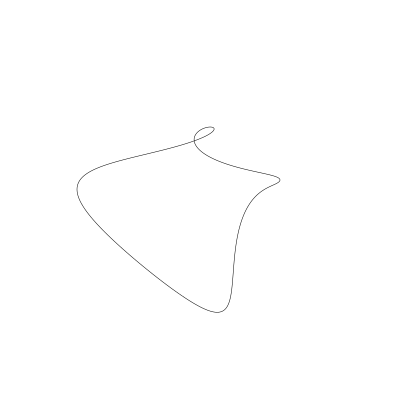

In [85]:
make(*okay(120, 40, 60, 40, 40, res=300), canvas_dim=(800,800))

40 60


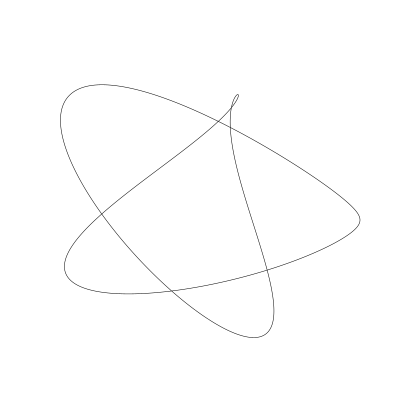

In [86]:
make(*okay(120, 80, 60, 40, 40, res=300), canvas_dim=(800,800))

30 60


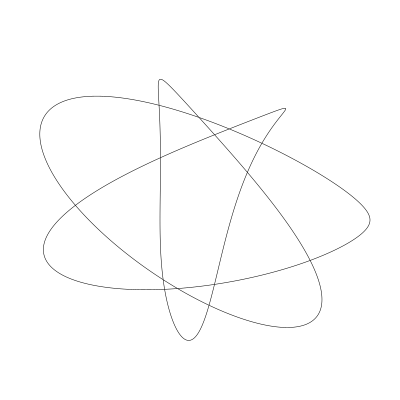

In [87]:
make(*okay(120, 90, 60, 40, 40, res=300), canvas_dim=(800,800))

30 30


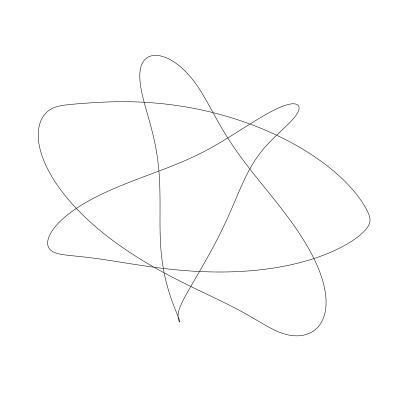

In [88]:
make(*okay(120, 90, 30, 40, 40, res=300), canvas_dim=(800,800))

20 40


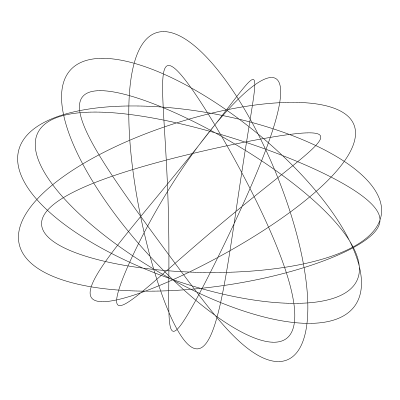

In [89]:
make(*okay(120, 100, 80, 40, 40, res=300), canvas_dim=(800,800))

20 60


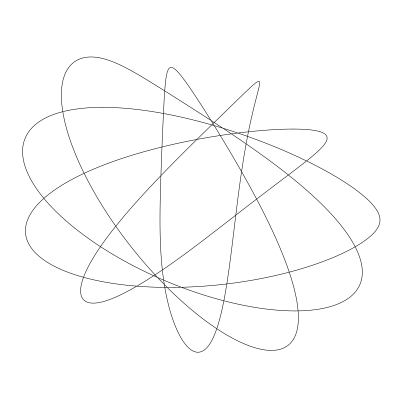

In [90]:
make(*okay(120, 100, 60, 40, 40, res=300), canvas_dim=(800,800))

30 1


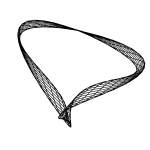

In [91]:
make(*okay(60, 30, 13, 20, 20, p1=.25*pi, res=50), canvas_dim=(300,300)) #1/2

30 1


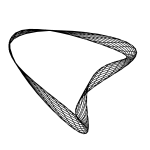

In [92]:
make(*okay(60, 30, 13, 20, 20, p1=.5*pi, res=50), canvas_dim=(300,300)) #1/2

30 1


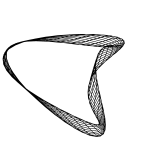

In [93]:
make(*okay(60, 30, 13, 20, 20, p1=.75*pi, res=50), canvas_dim=(300,300)) #1/2

5 1


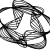

5 1


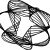

5 1


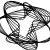

5 1


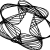

5 1


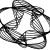

5 1


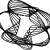

5 1


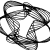

5 1


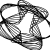

In [94]:
for i in range(8):
    make(*okay(25, 10, 7, 10, 10, p1=pi*i/4,p2=pi*i/4), canvas_dim=(100,100))

1 50


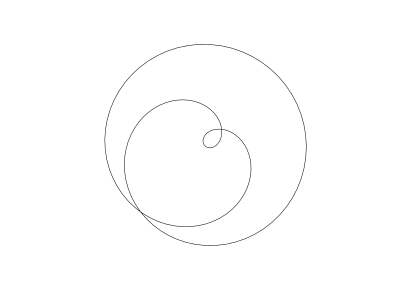

In [95]:
make(*okay(100, 1, 150, 80, 80), canvas_dim=(800, 600))

1 100


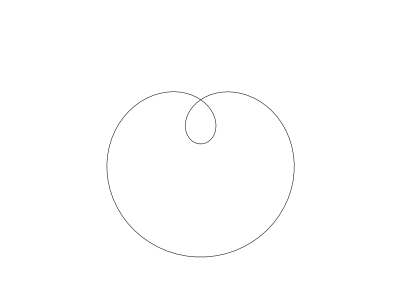

In [96]:
make(*okay(100, 1, 200, 80, 80), canvas_dim=(800, 600))

1 25


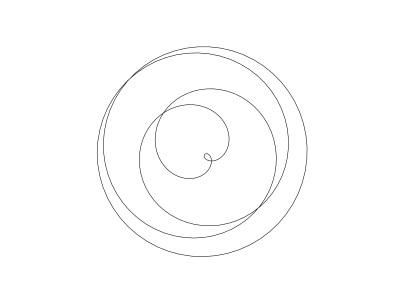

In [97]:
make(*okay(100, 1, 125, 80, 80), canvas_dim=(800, 600))

1 30


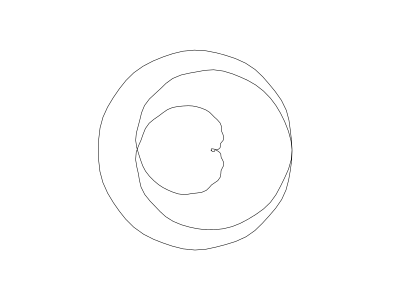

In [98]:
make(*okay(90, 1, 120, 80, 80), canvas_dim=(800, 600))

1 100


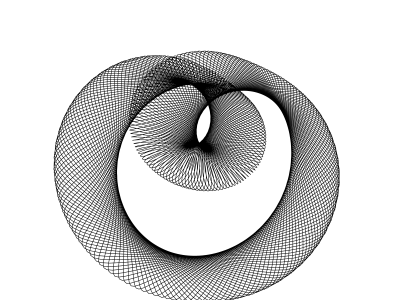

In [99]:
make(*okay(100, 47, 200, 80, 80), canvas_dim=(800, 600))

In [100]:


def basic2(base_r, r1, r2, r3, l1, l2, p1=0, p2=0,res=50):
    base_plate = Plate(base_r)
    child1 = Plate(r1, phase=p1)
    child2 = Plate(r2, phase=p2)
    child11 = Plate(r3)
    base_plate.add_child(child1, 0)
    base_plate.add_child(child2, pi)
    child1.add_child(child11, 0)
    while True:
        x1 = child11.x + child11.get_radius() * cos(child11.phase)
        y1 = child11.y + child11.get_radius() * sin(child11.phase)
        x2 = child11.x + child2.get_radius() * cos(child2.phase)
        y2 = child11.y + child2.get_radius() * sin(child2.phase)
        yield get_draw_position(x1, y1, x2, y2, l1, l2)
        base_plate.update((2*pi)/res)
        
def okay2(base_r, r1, r2, r3, l1, l2, p1=0,p2=0,res=50, grr=1):
    g1 = gcd(base_r, r1)
    g2 = gcd(base_r, r2)
    print(g1, g2)
    yay = lcml([r1//g1, r2//g2])
    yay = int(yay / grr)
    return basic2(base_r, r1, r2, r3, l1, l2, p1,p2,res), res*yay

50 1


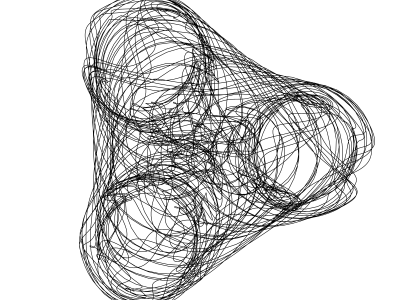

In [101]:
make(*okay2(100, 50, 39, 19, 80, 80, res=300), canvas_dim=(800, 600))

20 1


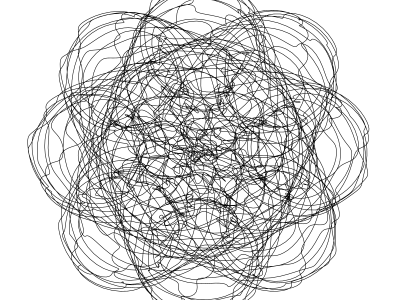

In [102]:
make(*okay2(100, 60, 39, 7, 80, 80, res=300), canvas_dim=(800, 600))

30 1


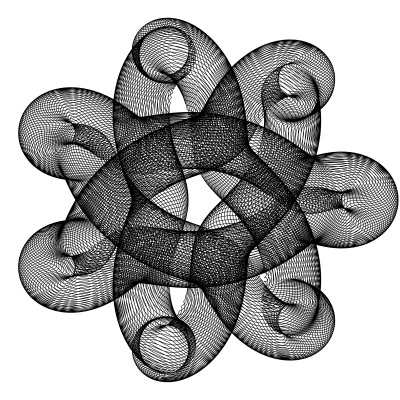

In [103]:
make(*okay2(120, 90, 59, 20, 40, 40, res=300), canvas_dim=(800,800))

60 1


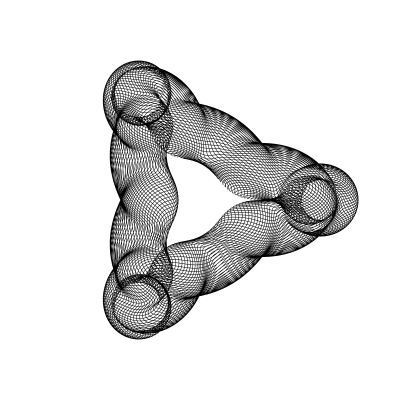

In [104]:
make(*okay2(120, 60, 59, 10, 40, 40, res=300), canvas_dim=(800,800))

30 1


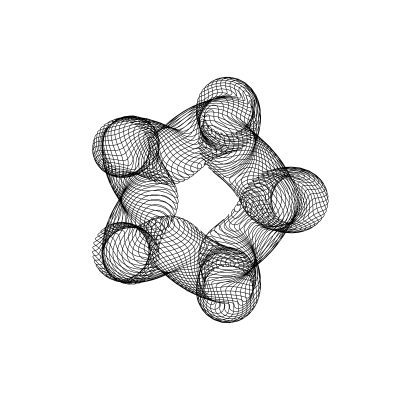

In [105]:
make(*okay2(120, 30, 29, 10, 40, 40, res=300), canvas_dim=(800,800))

60 1


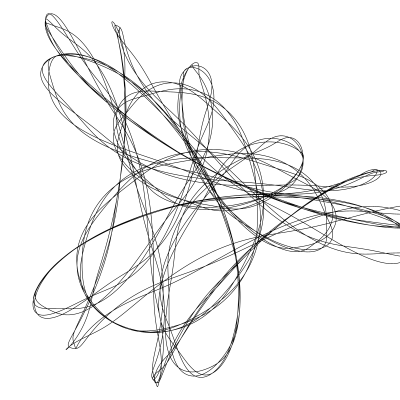

In [106]:
make(*okay2(120, 60, 19, 100, 40, 40, res=300), canvas_dim=(800,800))

60 1


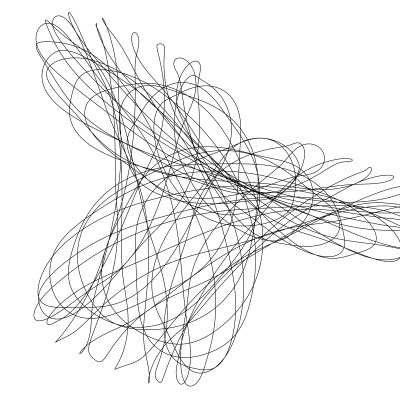

In [107]:
make(*okay2(120, 60, 19, 99, 40, 40, res=300), canvas_dim=(800,800))

60 1


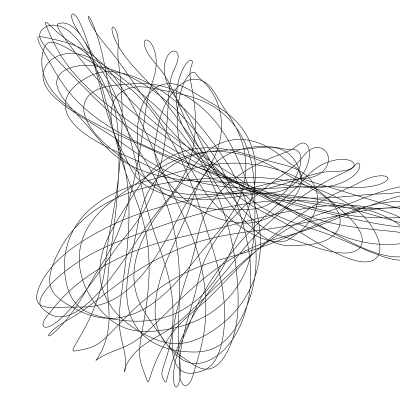

In [108]:
make(*okay2(120, 60, 19, 97, 40, 40, res=300), canvas_dim=(800,800))

60 1


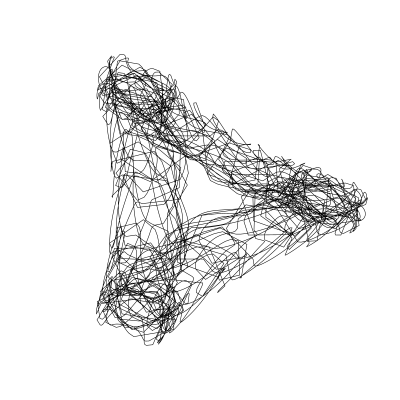

In [109]:
make(*okay2(120, 60, 19, 21, 40, 40, res=300), canvas_dim=(800,800))

30 1


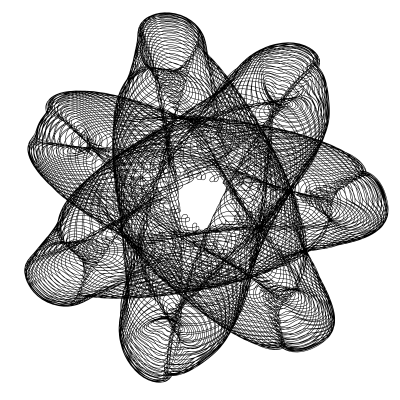

In [110]:
make(*okay2(120, 90, 49, 13, 40, 40, res=300), canvas_dim=(800,800))

30 1


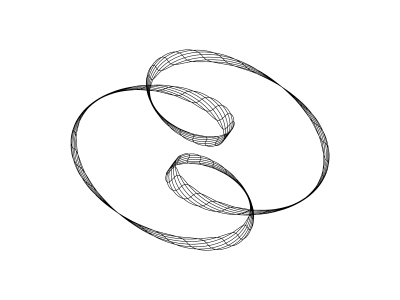

In [111]:
make(*okay(90, 30, 7, 80, 80, res=300), canvas_dim=(800, 600))

60 1


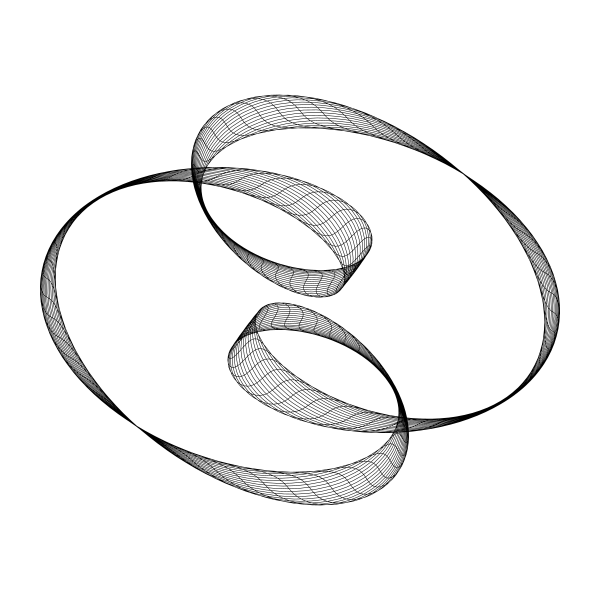

In [112]:
make(*okay(180, 60, 19, 160, 160, res=300), canvas_dim=(1200, 1200))

80 80


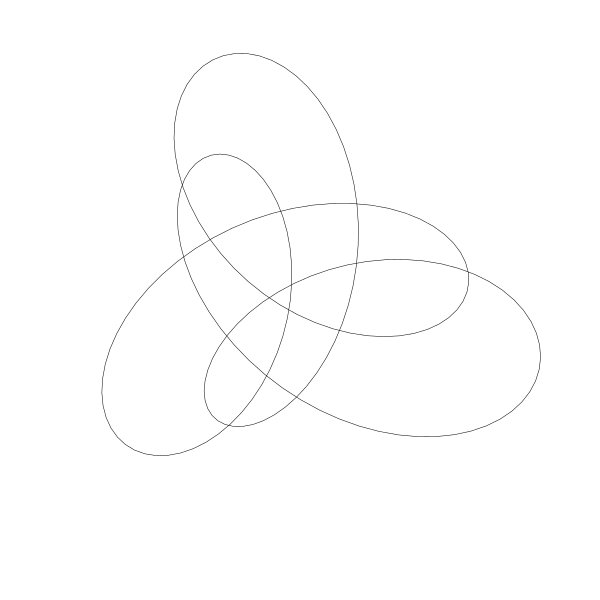

In [113]:
make(*okay(80, 160, 320, 80, 80, 50), canvas_dim=(1200, 1200))

40 1


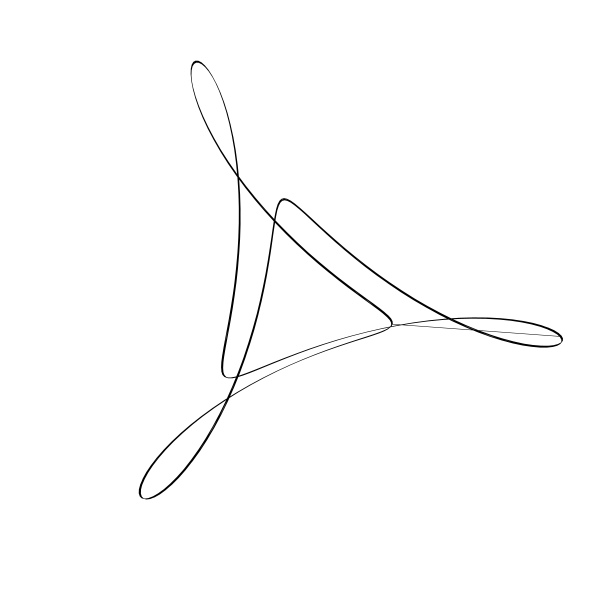

In [114]:
make(*okay2(40, 80, 19, 160, 10, 10, 50), canvas_dim=(1200, 1200))

40 1


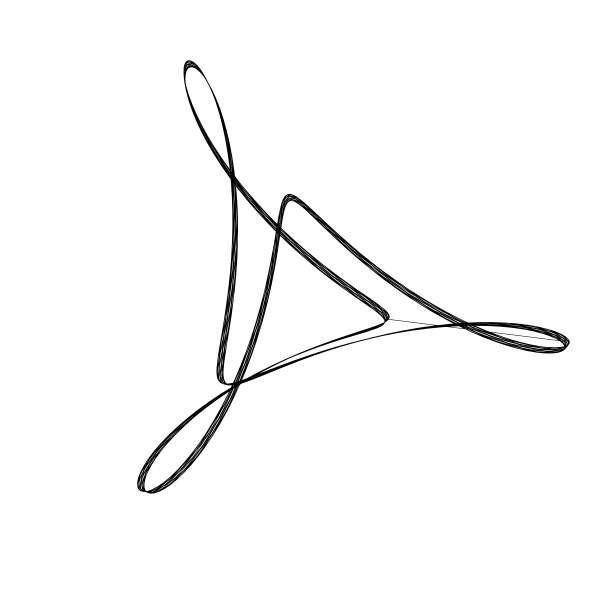

In [115]:
make(*okay2(40, 80, 39, 160, 20, 20, 50), canvas_dim=(1200, 1200))

40 1


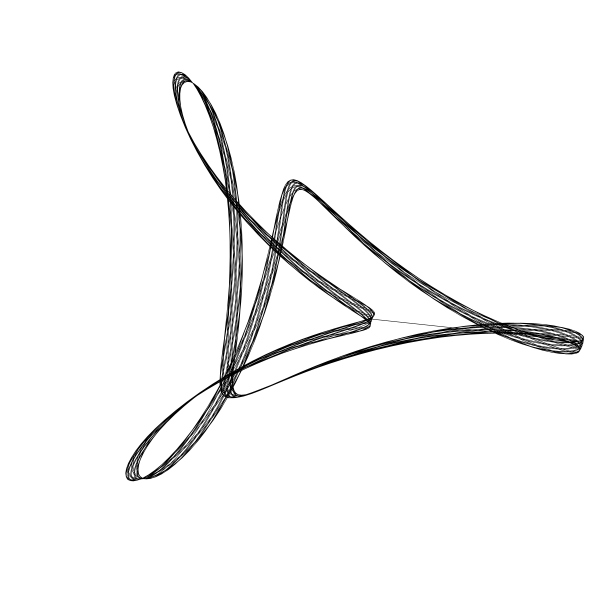

In [116]:
make(*okay2(40, 80, 39, 160, 20, 50, 50), canvas_dim=(1200, 1200))

40 1


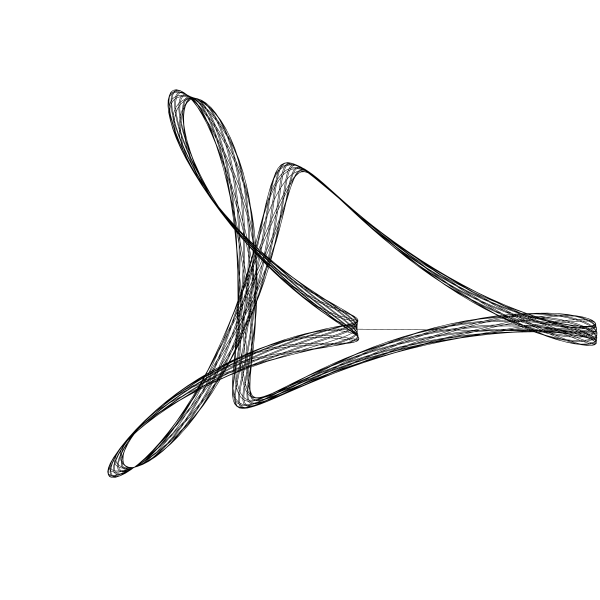

In [117]:
make(*okay2(40, 80, 39, 160, 0, 80, 50), canvas_dim=(1200, 1200))

70 1


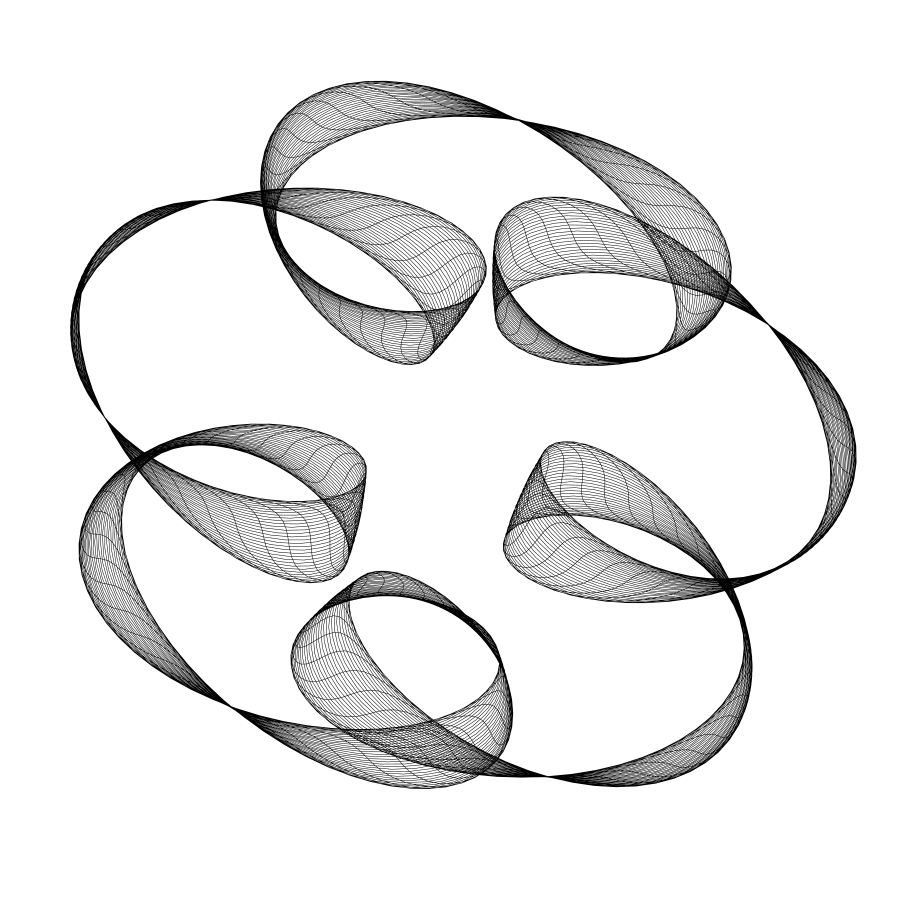

In [118]:
make(*okay(420, 70, 37, 180, 180, res=300), canvas_dim=(1800, 1800))

60 1


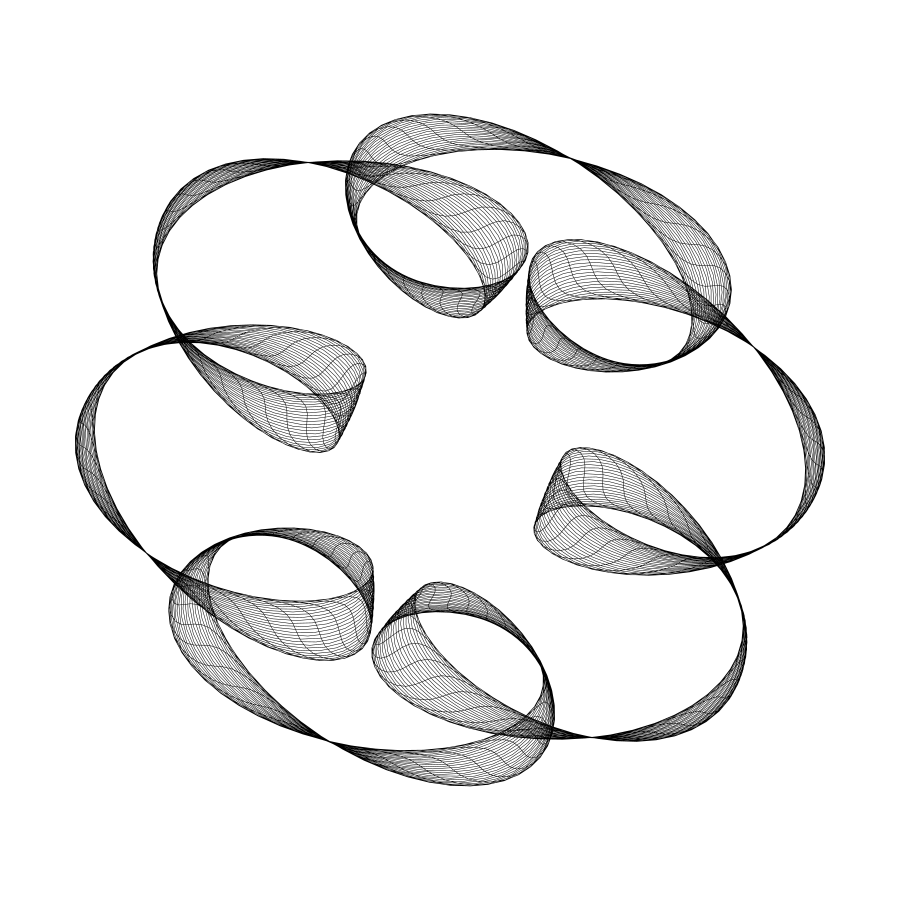

In [119]:
make(*okay(420, 60, 29, 150, 150, res=300), canvas_dim=(1800, 1800))

60 1


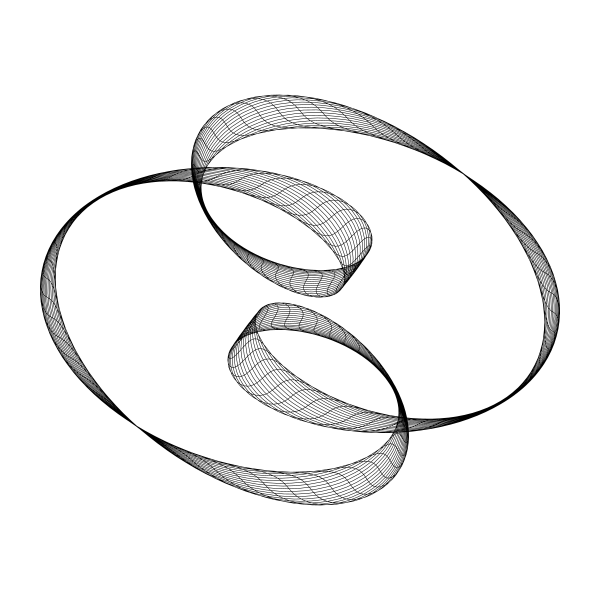

In [120]:
make(*okay(180, 60, 19, 160, 160, res=300), canvas_dim=(1200, 1200))

30 1


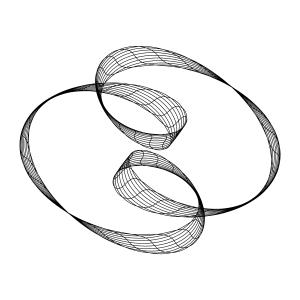

In [121]:
make(*okay(90, 30, 11, 80, 80, res=300), canvas_dim=(600, 600))